# Data Cleaning and Outlier Detection

1. **IQR (Interquartile Range) Method** 
2. **Z-Score Method** 
3. **Isolation Forest** 

## Objectives

- Understand different outlier detection strategies
- Compare detection methods
- Make informed decisions about which method to use

## 1. Setup and Data Loading

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ama_tlbx.data import LECol, LifeExpectancyDataset

np.random.seed(42)

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["figure.titlesize"] = 12
plt.rcParams["figure.labelsize"] = 11
plt.rcParams["figure.titleweight"] = "bold"


In [2]:
le_ds = LifeExpectancyDataset.from_csv(aggregate_by_country=True)
df = le_ds.df
df


year      status  life_expectancy  \
country                                                                 
Afghanistan                         2007  Developing             57.5   
Albania                             2007  Developing             75.9   
Algeria                             2007  Developing             73.8   
Angola                              2007  Developing             48.2   
Antigua and Barbuda                 2007  Developing             75.0   
...                                  ...         ...              ...   
Venezuela (Bolivarian Republic of)  2007  Developing             73.4   
Viet Nam                            2007  Developing             74.7   
Yemen                               2007  Developing             63.4   
Zambia                              2007  Developing             52.6   
Zimbabwe                            2007  Developing             46.6   

                                    adult_mortality  infant_deaths  alcohol  \
country                                                                       
Afghanistan                                   295.0             82     0.02   
Albania                                         9.0              1     5.58   
Algeria                                       129.0             20     0.44   
Angola                                        375.0             87     6.35   
Antigua and Barbuda                           144.0              0     8.64   
...                                             ...            ...      ...   
Venezuela (Bolivarian Republic of)            165.0              9     8.70   
Viet Nam                                      136.0             28     3.01   
Yemen                                          24.0             38     0.05   
Zambia                                        487.0             32     2.08   
Zimbabwe                                       67.0             29     3.88   

                                    percentage_expenditure  hepatitis_b  \
country                                                                   
Afghanistan                                      10.910156         63.0   
Albania                                          32.246552         98.0   
Algeria                                         320.323924          9.0   
Angola                                          184.821345         73.0   
Antigua and Barbuda                             257.966531         97.0   
...                                                    ...          ...   
Venezuela (Bolivarian Republic of)                0.000000         62.0   
Viet Nam                                          0.000000         67.0   
Yemen                                             0.000000         79.0   
Zambia                                           10.851482          8.0   
Zimbabwe                                         29.814566         72.0   

                                    measles   bmi  ...  polio  \
country                                            ...          
Afghanistan                            1141  15.2  ...   63.0   
Albania                                  22  51.7  ...   99.0   
Algeria                                   0   5.8  ...   95.0   
Angola                                 1014  18.8  ...   75.0   
Antigua and Barbuda                       0  42.6  ...   98.0   
...                                     ...   ...  ...    ...   
Venezuela (Bolivarian Republic of)       32  57.6  ...   67.0   
Viet Nam                                 17  12.3  ...   92.0   
Yemen                                    13  35.1  ...   79.0   
Zambia                                  535  19.2  ...   77.0   
Zimbabwe                                242  28.2  ...   73.0   

                                    total_expenditure  diphtheria  hiv_aids  \
country                                                                       
Afghanistan                                      6.73        63.0       0.1   

In [3]:
df[le_ds.numeric_cols].describe().T


count          mean           std  \
year                             183.0  2.007000e+03  0.000000e+00   
life_expectancy                  183.0  6.903607e+01  9.618584e+00   
adult_mortality                  183.0  1.598087e+02  1.260390e+02   
infant_deaths                    183.0  3.061202e+01  1.181577e+02   
alcohol                          182.0  5.014066e+00  4.147660e+00   
percentage_expenditure           183.0  9.544585e+02  2.420976e+03   
hepatitis_b                      159.0  8.158491e+01  2.468518e+01   
measles                          183.0  1.557541e+03  9.601303e+03   
bmi                              181.0  3.697790e+01  2.039153e+01   
under_five_deaths                183.0  4.273224e+01  1.630158e+02   
polio                            182.0  8.480220e+01  1.992429e+01   
total_expenditure                180.0  5.631056e+00  2.422470e+00   
diphtheria                       182.0  8.431868e+01  2.170336e+01   
hiv_aids                         183.0  1.992896e+00  5.277310e+00   
gdp                              156.0  8.537243e+03  1.614168e+04   
population                       143.0  1.853530e+07  1.015494e+08   
thinness_1_19_years              181.0  5.034807e+00  4.427321e+00   
thinness_5_9_years               181.0  4.976243e+00  4.512555e+00   
income_composition_of_resources  173.0  6.390000e-01  1.893627e-01   
schooling                        173.0  1.203815e+01  3.164325e+00   

                                        min            25%           50%  \
year                             2007.00000    2007.000000  2.007000e+03   
life_expectancy                    45.30000      62.050000  7.240000e+01   
adult_mortality                     1.00000      65.500000  1.360000e+02   
infant_deaths                       0.00000       0.000000  3.000000e+00   
alcohol                             0.01000       1.252500  4.080000e+00   
percentage_expenditure              0.00000       7.527855  7.482175e+01   
hepatitis_b                         5.00000      81.000000  9.200000e+01   
measles                             0.00000       0.000000  8.000000e+00   
bmi                                 2.10000      18.000000  4.260000e+01   
under_five_deaths                   0.00000       0.000000  4.000000e+00   
polio                               4.00000      79.500000  9.300000e+01   
total_expenditure                   0.37000       3.895000  5.620000e+00   
diphtheria                          4.00000      82.000000  9.300000e+01   
hiv_aids                            0.10000       0.100000  1.000000e-01   
gdp                                17.79995     389.875337  1.639815e+03   
population                        349.00000  179932.000000  1.317885e+06   
thinness_1_19_years                 0.10000       1.700000  3.400000e+00   
thinness_5_9_years                  0.10000       1.700000  3.400000e+00   
income_composition_of_resources     0.00000       0.495000  6.870000e-01   
schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
year                             2.007000e+03  2.007000e+03  
life_expectancy                  7.515000e+01  8.900000e+01  
adult_mortality                  2.280000e+02  6.330000e+02  
infant_deaths                    2.200000e+01  1.400000e+03  
alcohol                          8.445000e+00  1.787000e+01  
percentage_expenditure           5.117608e+02  1.482941e+04  
hepatitis_b                      9.600000e+01  9.900000e+01  
measles                          1.975000e+02  1.090230e+05  
bmi                              5.630000e+01  7.340000e+01  
under_five_deaths                2.950000e+01  1.900000e+03  
polio                            9.700000e+01  9.900000e+01  
total_expenditure                6.975000e+00  1.557000e+01  
diphtheria                       9.700000e+01  9.900000e+01  
hiv_aids                         9.000000e-01  4.070000e+01  
gdp                              5.

## Exploratory Data Visualization

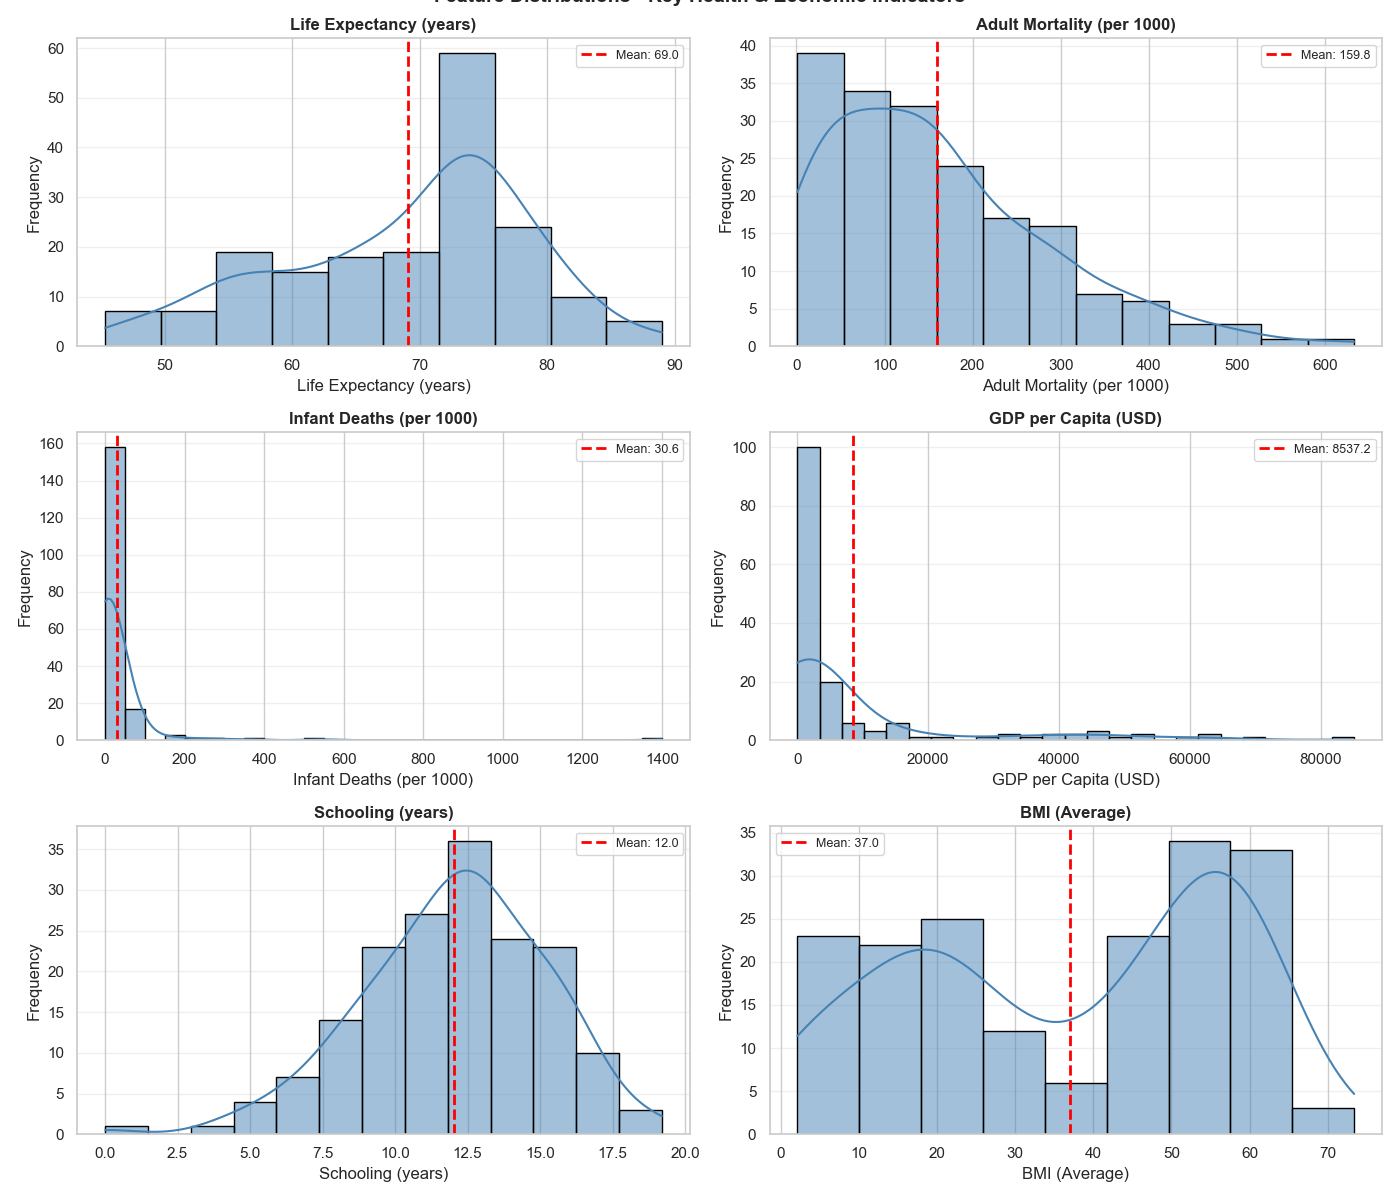

In [4]:
key_features = [
    LECol.LIFE_EXPECTANCY,
    LECol.ADULT_MORTALITY,
    LECol.INFANT_DEATHS,
    LECol.GDP,
    LECol.SCHOOLING,
    LECol.BMI,
]

# Create distribution plots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    data = df[col].dropna()

    # Create histogram with KDE
    sns.histplot(
        data=data,
        kde=True,
        ax=axes[idx],
        color="steelblue",
        edgecolor="black",
    )

    pretty_name = le_ds.get_pretty_name(col)
    axes[idx].set_title(f"{pretty_name}", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel(pretty_name)
    axes[idx].set_ylabel("Frequency")

    # Add mean and median
    axes[idx].axvline(
        data.mean(),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {data.mean():.1f}",
    )
    axes[idx].legend(fontsize=9)
    axes[idx].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.suptitle(
    "Feature Distributions - Key Health & Economic Indicators",
    y=1.01,
    fontsize=14,
    fontweight="bold",
)
plt.show()


## Observations:
- `Life Expectancy`: Roughly normal
- `Adult Mortality`: Right-skewed (most countries moderate, few very high)
- `Infant Deaths`: Extremely right-skewed (most small, few giants like China/India)
- `GDP`: 
  - Heavily right-skewed (long tail with wealthy countries ~ global wealth inequality)
  - two strong peaks 
    - `mode` at lowest bin (e.g. GDP < 2.000$): many poor third-world countries
    - second peak, around 8k: many second-world countries
- `Schooling`: roughly normal with slight left skew (correlated with right-skewed GDP)
- `BMI`: bimodal distribution (underweight ... healthy + second peak overweight/obese)

### 3.2 Complete Feature Overview

Now let's look at ALL numeric features to get a comprehensive view of the entire dataset.

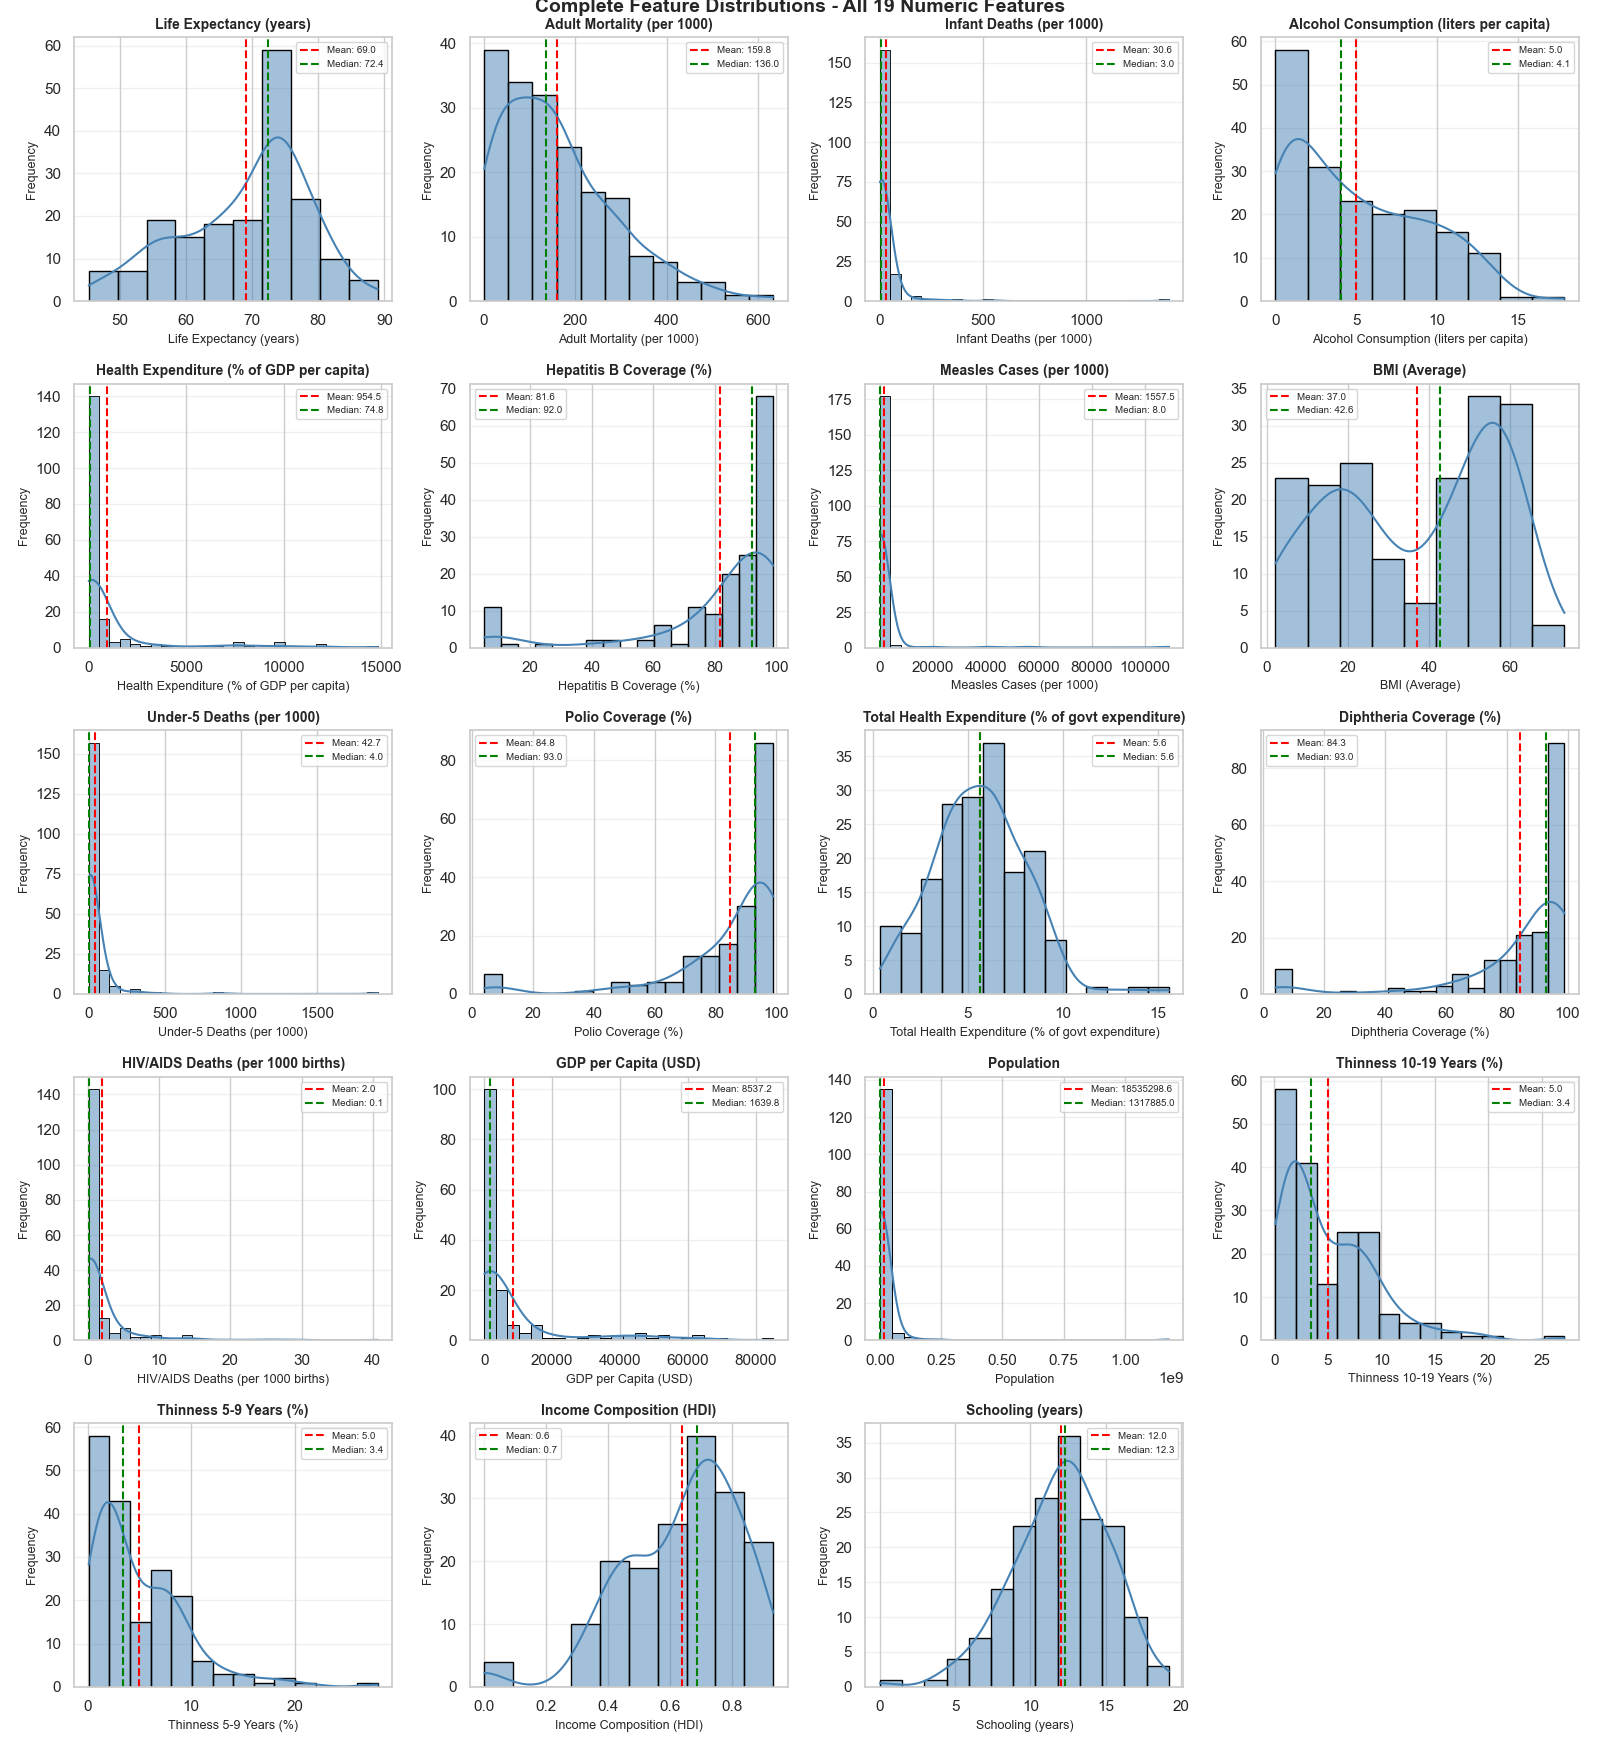

In [5]:
# Get grid dimensions
n_features = len(le_ds.feature_columns(include_target=True))
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3.5))
axes = axes.flatten()

for idx, col in enumerate(le_ds.feature_columns(include_target=True)):
    data = df[col].dropna()

    # Create histogram with KDE
    sns.histplot(
        data=data,
        kde=True,
        ax=axes[idx],
        color="steelblue",
        edgecolor="black",
    )

    pretty_name = le_ds.get_pretty_name(col)
    axes[idx].set_title(f"{pretty_name}", fontsize=10, fontweight="bold")
    axes[idx].set_xlabel(pretty_name, fontsize=9)
    axes[idx].set_ylabel("Frequency", fontsize=9)

    # Add mean line
    axes[idx].axvline(
        data.mean(),
        color="red",
        linestyle="--",
        linewidth=1.5,
        label=f"Mean: {data.mean():.1f}",
    )
    # Add median line
    axes[idx].axvline(
        data.median(),
        color="green",
        linestyle="--",
        linewidth=1.5,
        label=f"Median: {data.median():.1f}",
    )
    axes[idx].legend(fontsize=7)
    axes[idx].grid(axis="y", alpha=0.3)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle(
    f"Complete Feature Distributions - All {n_features} Numeric Features",
    y=1.001,
    fontsize=14,
    fontweight="bold",
)
plt.show()


- Life Expectancy: ~symmetric; mild skew at most. Good candidate for z-scaling without transform.
- Schooling (years): near-normal with a slight left tail (low-schooling countries).
- Adult Mortality / Infant deaths / Under-5 deaths / HIV/AIDS deaths: strong right-skew; a few countries carry huge density $\rightarrow$ transform?.
- Measles cases: classic zero/near-zero inflation + fat right tail; log scale will reveal structure.
- GDP per capita: textbook Pareto-ish inequality; log transform mandatory for linear models.
- Population: heavily right-skewed $\rightarrow$ log-tf?.
- Coverage (%): Diphtheria, HepB, Polio: mass at 80–100; left-skew with a small tail of low-coverage countries (these are the interesting outliers).
- Income Composition (0–1): bounded, skewed to the right (toward higher development).
- Thinness 5–9 / 10–19 (%): small percentages with a right tail; sensitive to zeros and small-n.
- Health expenditure (% of gov exp): moderate skew; check tails and regional clusters.
- Health expenditure (per capita, if plotted): behaves like GDP — log it.

**TODO**: group features by type (demographic, economic, vaccination coverage, index for infectious diseases, child health, etc.)

**TODO**: which features need log or power transformation to reduce skewness?

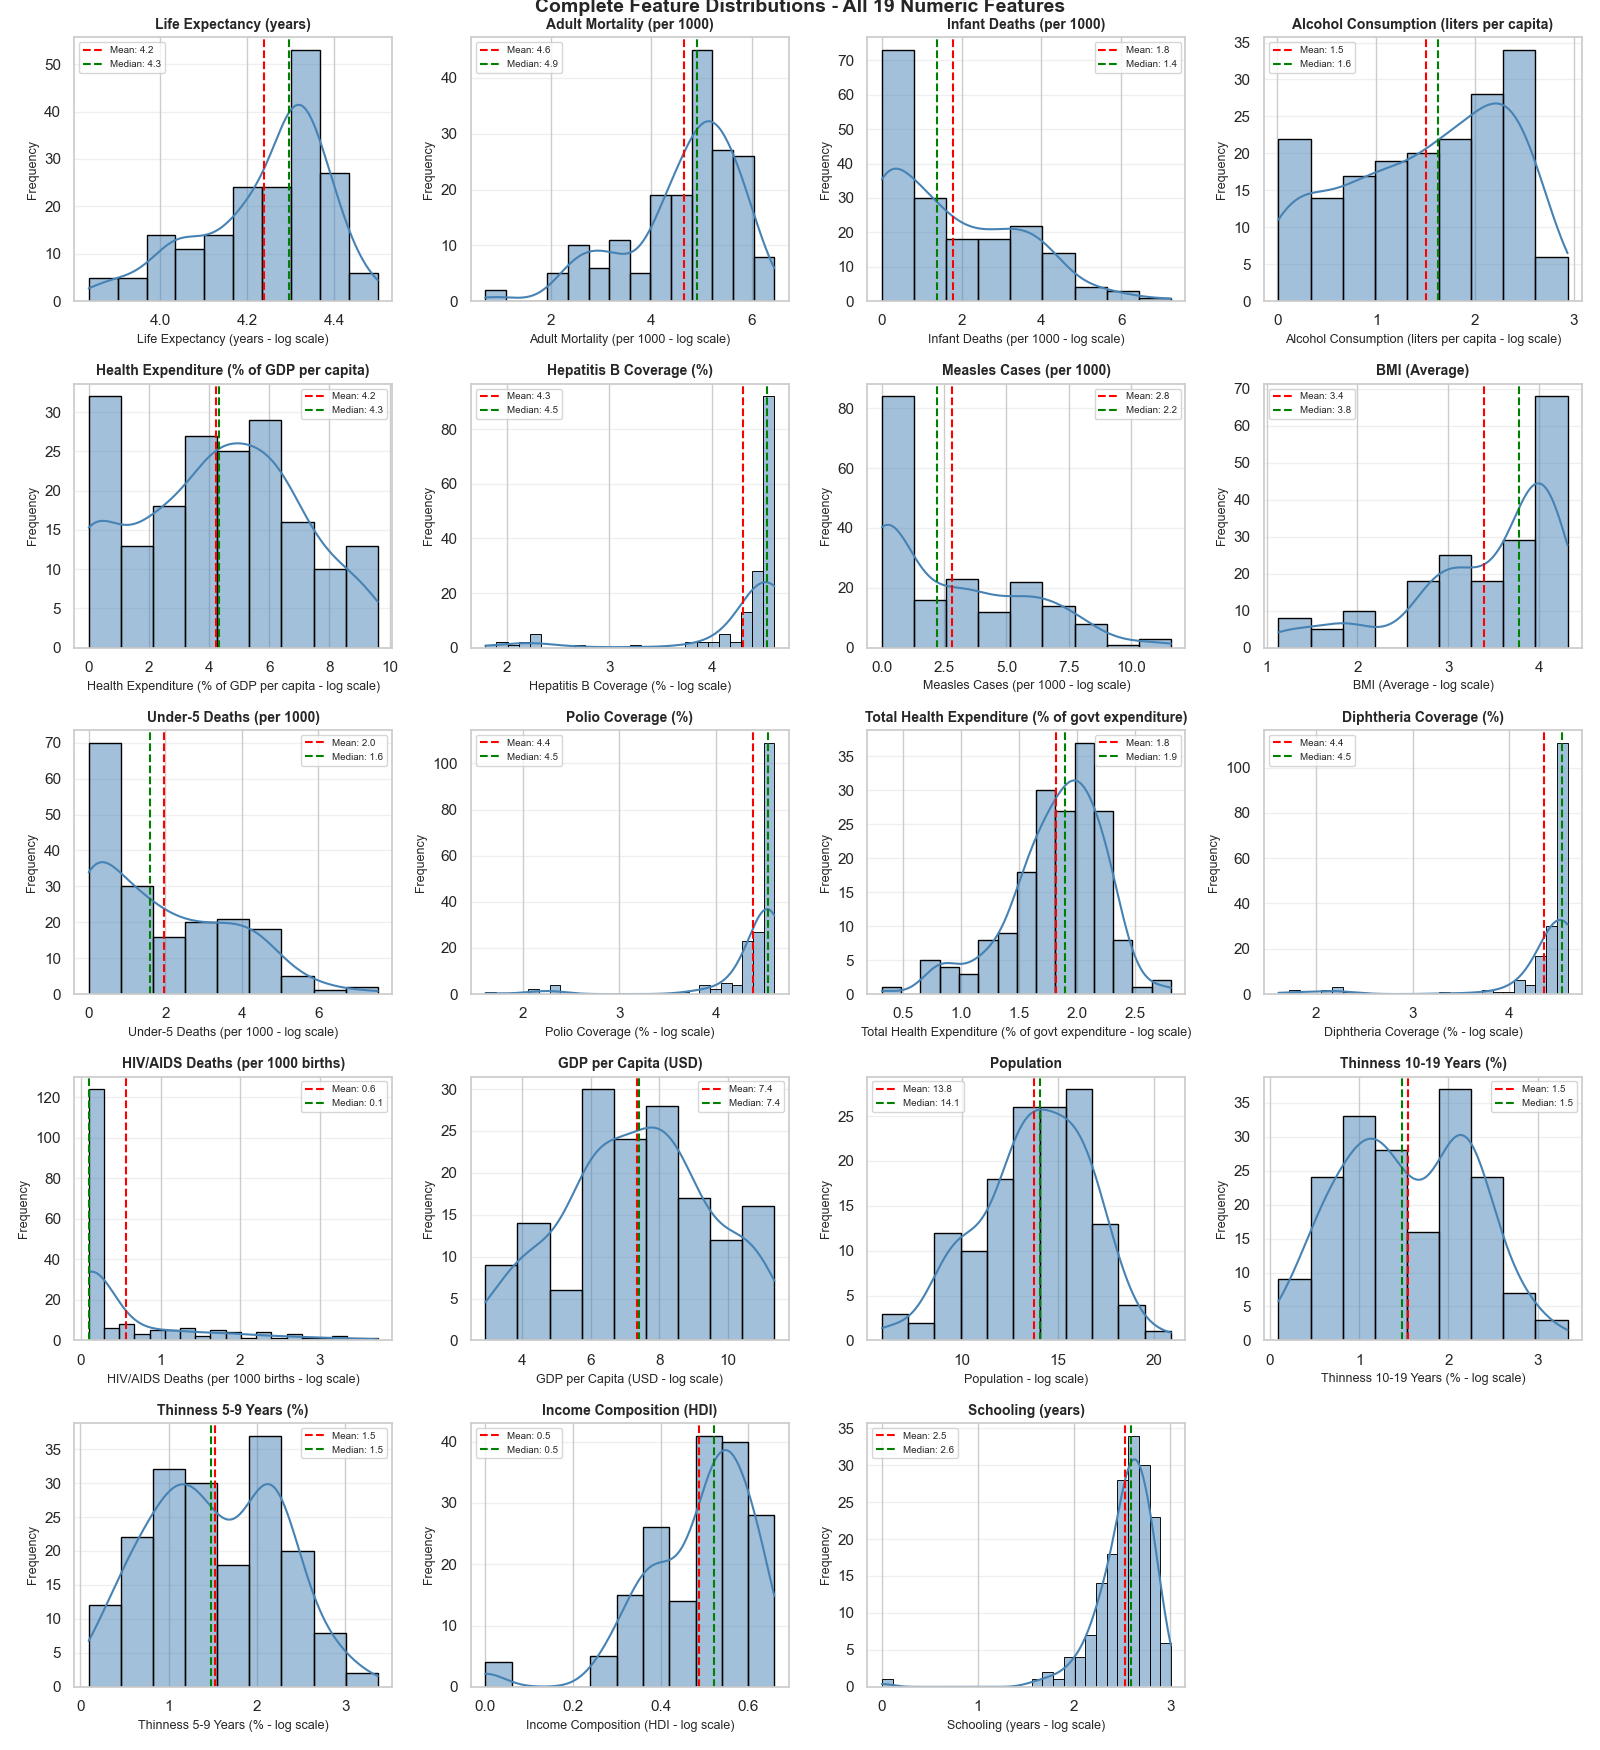

In [6]:
# Get grid dimensions
n_features = len(le_ds.feature_columns(include_target=True))
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3.5))
axes = axes.flatten()

for idx, col in enumerate(le_ds.feature_columns(include_target=True)):
    data = np.log1p(df[col].dropna())

    # Create histogram with KDE
    sns.histplot(
        data=data,
        kde=True,
        ax=axes[idx],
        color="steelblue",
        edgecolor="black",
    )

    pretty_name = le_ds.get_pretty_name(col)
    axes[idx].set_title(f"{pretty_name}", fontsize=10, fontweight="bold")
    axes[idx].set_xlabel(f"{pretty_name.replace(')', '')} - log scale)", fontsize=9)
    axes[idx].set_ylabel("Frequency", fontsize=9)

    # Add mean line
    axes[idx].axvline(
        np.mean(data),
        color="red",
        linestyle="--",
        linewidth=1.5,
        label=f"Mean: {np.mean(data):.1f}",
    )
    # Add median line
    axes[idx].axvline(
        np.median(data),
        color="green",
        linestyle="--",
        linewidth=1.5,
        label=f"Median: {np.median(data):.1f}",
    )
    axes[idx].legend(fontsize=7)
    axes[idx].grid(axis="y", alpha=0.3)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle(
    f"Complete Feature Distributions - All {n_features} Numeric Features",
    y=1.001,
    fontsize=14,
    fontweight="bold",
)
plt.show()

# TODO: group features by type (demographic, economic, vaccination coverage, index for infectious diseases, etc.)
# TODO: which features need log or power transformation to reduce skewness?


In [9]:
# Use factory method to create IQR detector
iqr_detector = le_ds.make_iqr_outlier_detector(
    columns=None,  # None = all numeric features
    standardized=False,
    threshold=1.5,
)

# Fit and get results
iqr_result = iqr_detector.fit().result()

print("=== IQR Method Results ===")
print(
    f"Total data points: {iqr_result.outlier_mask.shape[0] * iqr_result.outlier_mask.shape[1]:,}"
)
print(
    f"\nRows with at least one outlier: {iqr_result.outlier_mask.any(axis=1).sum()} / {len(iqr_result.outlier_mask)}"
)

print("\n=== Features with Most Outliers ===")
feature_outliers_df = (
    iqr_result.n_outliers_per_column.sort_values(ascending=False)
    .head(10)
    .to_frame(name="Count")
)
feature_outliers_df["Percentage"] = (
    feature_outliers_df["Count"] / len(df) * 100
).round(1)
# Use pretty names from result
feature_outliers_df.index = [
    iqr_result.pretty_names.get(col, col) for col in feature_outliers_df.index
]
feature_outliers_df.index.name = "Feature"
display(feature_outliers_df)


=== IQR Method Results ===
Total data points: 3,294

Rows with at least one outlier: 110 / 183

=== Features with Most Outliers ===


Count  Percentage
Feature                                                    
HIV/AIDS Deaths (per 1000 births)            34        18.6
Measles Cases (per 1000)                     30        16.4
Health Expenditure (% of GDP per capita)     26        14.2
Under-5 Deaths (per 1000)                    25        13.7
GDP per Capita (USD)                         25        13.7
Infant Deaths (per 1000)                     21        11.5
Population                                   20        10.9
Hepatitis B Coverage (%)                     19        10.4
Diphtheria Coverage (%)                      16         8.7
Polio Coverage (%)                           12         6.6

### Z-Score Method

In [10]:
# Use factory method to create Z-Score detector
zscore_detector = le_ds.make_zscore_outlier_detector(
    columns=None, standardized=True, threshold=3.0
)

# Fit and get results
zscore_result = zscore_detector.fit().result()

print("=== Z-Score Method Results ===")
print(
    f"Total data points: {zscore_result.outlier_mask.shape[0] * zscore_result.outlier_mask.shape[1]:,}"
)
print(
    f"\nRows with at least one outlier: {zscore_result.outlier_mask.any(axis=1).sum()} / {len(zscore_result.outlier_mask)}"
)

print("\n=== Features with Most Outliers ===")
feature_outliers_df = (
    zscore_result.n_outliers_per_column.sort_values(ascending=False)
    .head(10)
    .to_frame(name="Count")
)
feature_outliers_df["Percentage"] = (
    feature_outliers_df["Count"] / len(df) * 100
).round(1)
feature_outliers_df.index = [
    zscore_result.pretty_names.get(col, col) for col in feature_outliers_df.index
]
feature_outliers_df.index.name = "Feature"
display(feature_outliers_df)


=== Z-Score Method Results ===
Total data points: 3,294

Rows with at least one outlier: 39 / 183

=== Features with Most Outliers ===


Count  Percentage
Feature                                                    
Diphtheria Coverage (%)                       9         4.9
Polio Coverage (%)                            7         3.8
Health Expenditure (% of GDP per capita)      6         3.3
HIV/AIDS Deaths (per 1000 births)             5         2.7
GDP per Capita (USD)                          5         2.7
Income Composition (HDI)                      4         2.2
Hepatitis B Coverage (%)                      4         2.2
Measles Cases (per 1000)                      3         1.6
Thinness 5-9 Years (%)                        3         1.6
Thinness 10-19 Years (%)                      3         1.6

### Isolation Forest Method

In [11]:
# Use factory method to create Isolation Forest detector
iforest_detector = le_ds.make_isolation_forest_outlier_detector(
    columns=None,
    standardized=True,
    contamination="auto",
    random_state=42,
    n_estimators=100,
)

# Fit and get results
iforest_result = iforest_detector.fit().result()

print("=== Isolation Forest Method Results ===")
print(
    f"Total data points: {iforest_result.outlier_mask.shape[0] * iforest_result.outlier_mask.shape[1]:,}"
)
print(
    f"\nRows with at least one outlier: {iforest_result.outlier_mask.any(axis=1).sum()} / {len(iforest_result.outlier_mask)}"
)

print("\n=== Features with Most Outliers ===")
feature_outliers_df = (
    iforest_result.n_outliers_per_column.sort_values(ascending=False)
    .head(10)
    .to_frame(name="Count")
)
feature_outliers_df["Percentage"] = (
    feature_outliers_df["Count"] / len(df) * 100
).round(1)
feature_outliers_df.index = [
    iforest_result.pretty_names.get(col, col) for col in feature_outliers_df.index
]
feature_outliers_df.index.name = "Feature"
display(feature_outliers_df)


=== Isolation Forest Method Results ===
Total data points: 3,294

Rows with at least one outlier: 11 / 183

=== Features with Most Outliers ===


Count  Percentage
Feature                                                            
Adult Mortality (per 1000)                           11         6.0
Infant Deaths (per 1000)                             11         6.0
Income Composition (HDI)                             11         6.0
Thinness 5-9 Years (%)                               11         6.0
Thinness 10-19 Years (%)                             11         6.0
Population                                           11         6.0
GDP per Capita (USD)                                 11         6.0
HIV/AIDS Deaths (per 1000 births)                    11         6.0
Diphtheria Coverage (%)                              11         6.0
Total Health Expenditure (% of govt expenditure)     11         6.0

## 5. Method Comparison Visualization

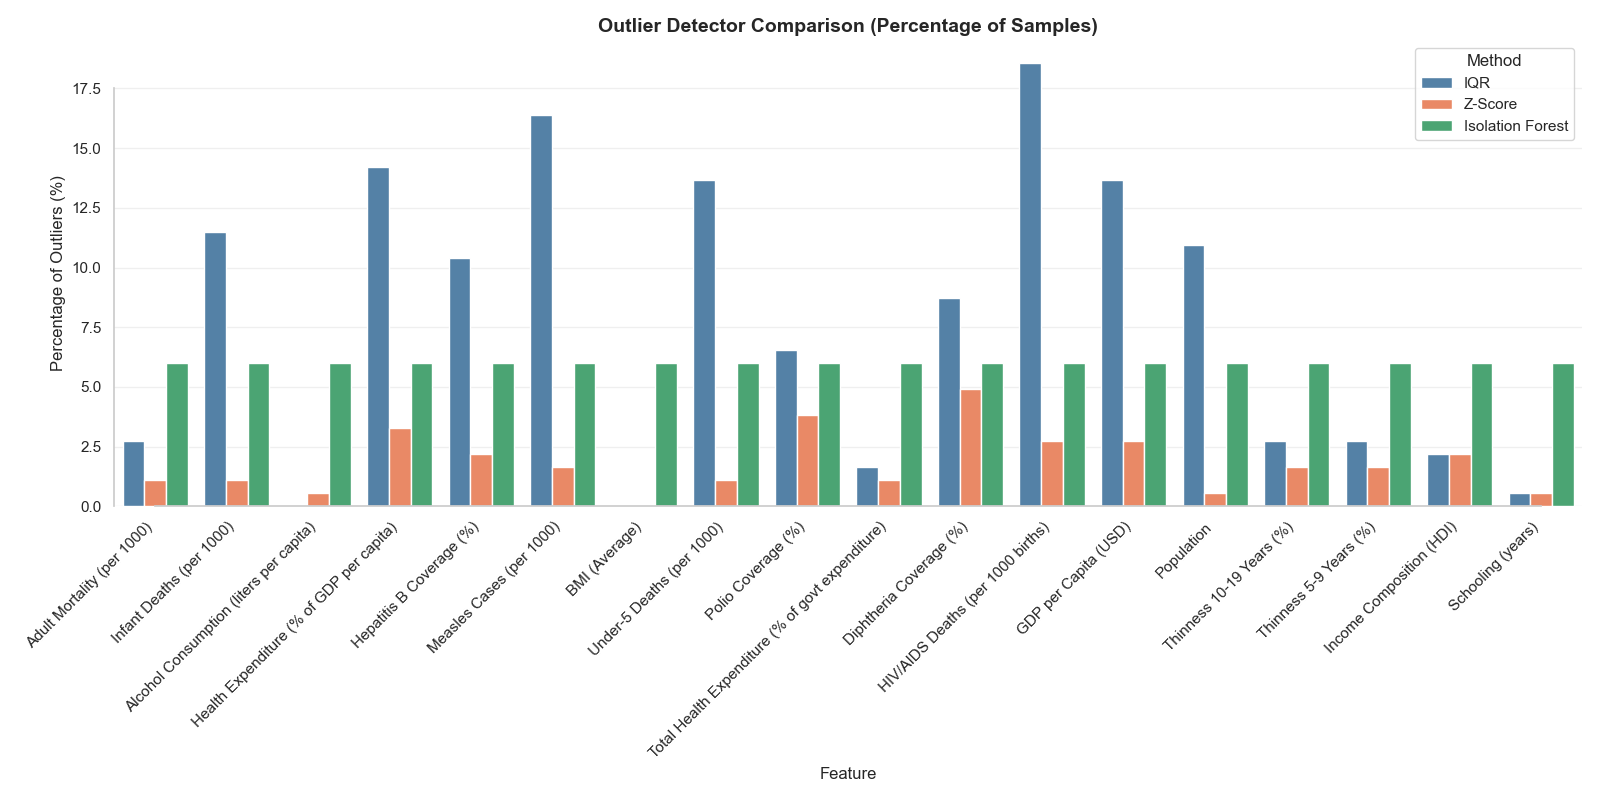

In [12]:
# Compare outlier detection rates across methods
comparison_data = pd.DataFrame(
    {
        "IQR": iqr_result.n_outliers_per_column,
        "Z-Score": zscore_result.n_outliers_per_column,
        "Isolation Forest": iforest_result.n_outliers_per_column,
    }
).fillna(0)

# Create pretty labels for features (use pretty_names from results)
pretty_labels = [iqr_result.pretty_names.get(col, col) for col in comparison_data.index]

# Percentage data
comparison_pct = comparison_data / len(df) * 100
comparison_pct_long = comparison_pct.reset_index()
comparison_pct_long.columns = ["Feature", "IQR", "Z-Score", "Isolation Forest"]
comparison_pct_long["Feature"] = pretty_labels
comparison_pct_long_melted = comparison_pct_long.melt(
    id_vars="Feature", var_name="Method", value_name="Percentage"
)

# Plot comparison
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(
    data=comparison_pct_long_melted,
    x="Feature",
    y="Percentage",
    hue="Method",
    palette=["steelblue", "coral", "mediumseagreen"],
    ax=ax,
)
ax.set_title(
    "Outlier Detector Comparison (Percentage of Samples)",
    fontsize=14,
    fontweight="bold",
)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("Percentage of Outliers (%)", fontsize=12)
ax.legend(title="Method", fontsize=11)
ax.tick_params(axis="x", rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax.grid(axis="y", alpha=0.3)

sns.despine(trim=True)
plt.tight_layout()
plt.show()


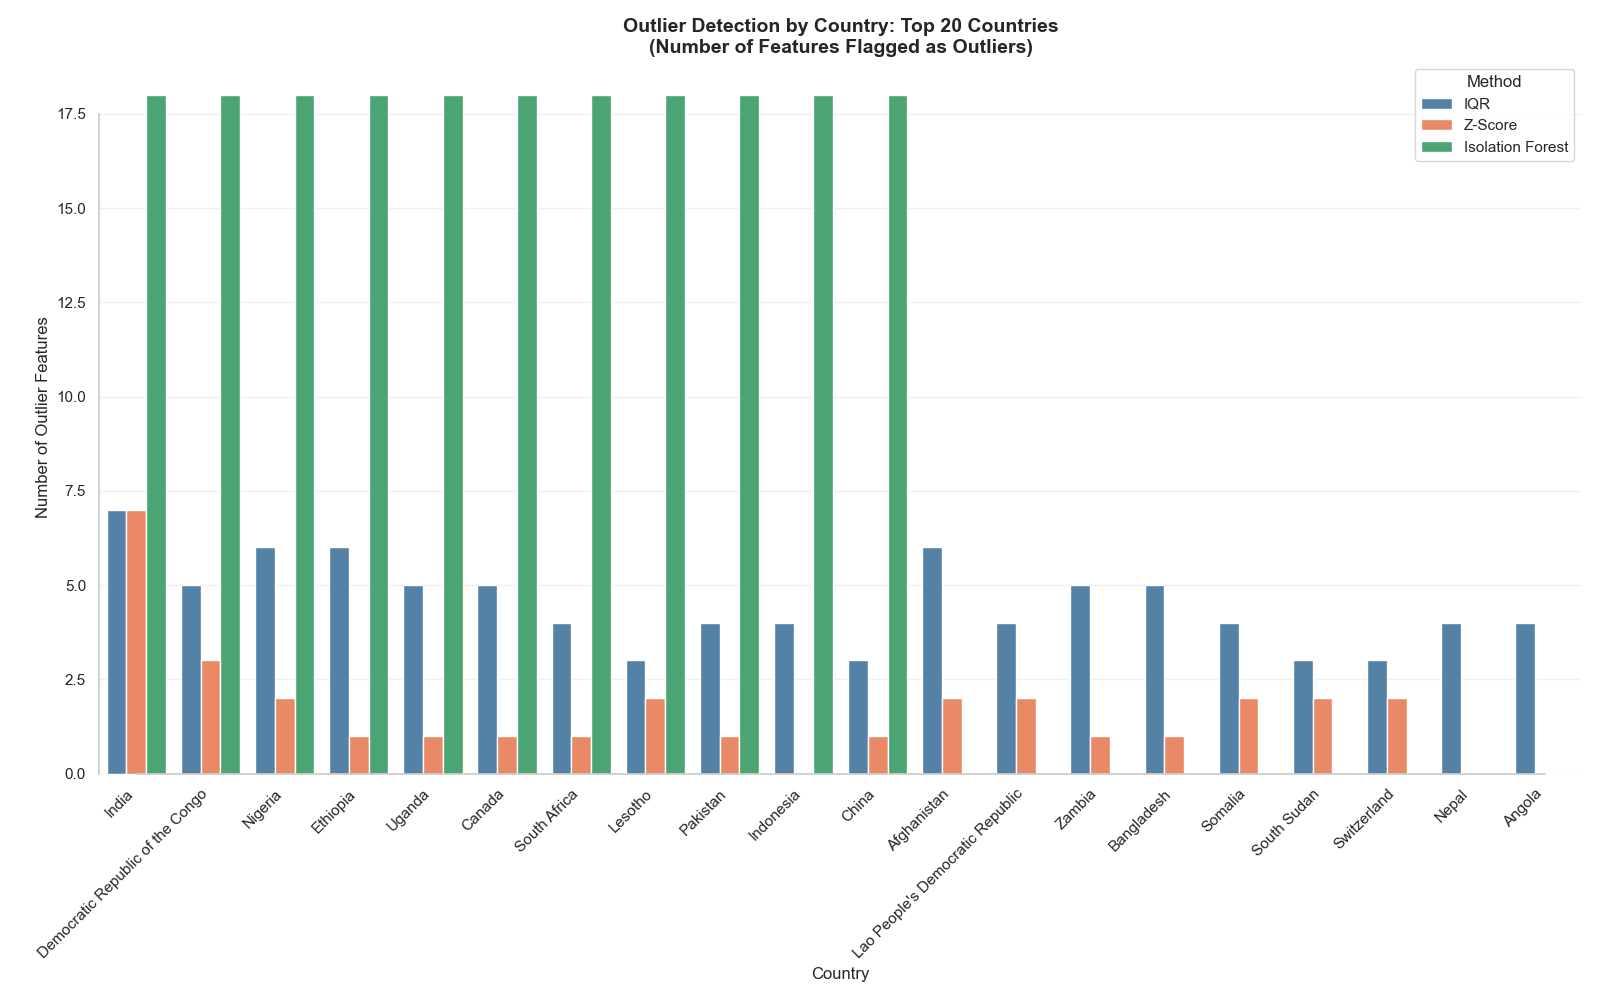

In [13]:
# Create comparison DataFrame for countries with outliers
country_comparison_data = pd.DataFrame(
    {
        "IQR": iqr_result.n_outliers_per_row,
        "Z-Score": zscore_result.n_outliers_per_row,
        "Isolation Forest": iforest_result.n_outliers_per_row,
    }
)

# Filter to countries with at least one outlier in any method
country_comparison_filtered = country_comparison_data[
    (country_comparison_data > 0).any(axis=1)
]

# Get top 20 countries with most outliers (across all methods)
top_countries = (
    country_comparison_filtered.sum(axis=1).sort_values(ascending=False).head(20).index
)

# Prepare data for plotting - country names are already the index
country_comparison_top = country_comparison_filtered.loc[top_countries]
country_comparison_top["Country"] = country_comparison_top.index
country_comparison_melted = country_comparison_top.melt(
    id_vars="Country", var_name="Method", value_name="Outlier Count"
)

# Plot comparison
fig, ax = plt.subplots(figsize=(16, 10))

sns.barplot(
    data=country_comparison_melted,
    x="Country",
    y="Outlier Count",
    hue="Method",
    palette=["steelblue", "coral", "mediumseagreen"],
    ax=ax,
)
ax.set_title(
    "Outlier Detection by Country: Top 20 Countries\n(Number of Features Flagged as Outliers)",
    fontsize=14,
    fontweight="bold",
)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Number of Outlier Features", fontsize=12)
ax.legend(title="Method", fontsize=11)
ax.tick_params(axis="x", rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax.grid(axis="y", alpha=0.3)

sns.despine(trim=True)
plt.tight_layout()
plt.show()


## Outlier Agreement Methods

In [14]:
# Analyze which observations are flagged by multiple methods
iqr_outlier_rows = iqr_result.outlier_mask.any(axis=1)
zscore_outlier_rows = zscore_result.outlier_mask.any(axis=1)
iforest_outlier_rows = iforest_result.outlier_mask.any(axis=1)

# Create Venn diagram data
all_three = iqr_outlier_rows & zscore_outlier_rows & iforest_outlier_rows
iqr_zscore = iqr_outlier_rows & zscore_outlier_rows & ~iforest_outlier_rows
iqr_iforest = iqr_outlier_rows & ~zscore_outlier_rows & iforest_outlier_rows
zscore_iforest = ~iqr_outlier_rows & zscore_outlier_rows & iforest_outlier_rows
only_iqr = iqr_outlier_rows & ~zscore_outlier_rows & ~iforest_outlier_rows
only_zscore = ~iqr_outlier_rows & zscore_outlier_rows & ~iforest_outlier_rows
only_iforest = ~iqr_outlier_rows & ~zscore_outlier_rows & iforest_outlier_rows

print(
    f"- Countries flagged by all 3 methods: {all_three.sum()}:\n{df.index[all_three].tolist()}"
)
print(
    f"- Countries flagged by 2 methods: {(iqr_zscore.sum() + iqr_iforest.sum() + zscore_iforest.sum())}:\n{df.index[iqr_zscore | iqr_iforest | zscore_iforest].tolist()}"
)
print(
    f"- Countries flagged by only 1 method: {(only_iqr.sum() + only_zscore.sum() + only_iforest.sum())}"
)
print(f"\nUnique outliers per method:")
print(f"  - IQR only: {only_iqr.sum()}")
print(f"  - Z-Score only: {only_zscore.sum()}")
print(f"  - Isolation Forest only: {only_iforest.sum()}")


- Countries flagged by all 3 methods: 10:
['Canada', 'China', 'Democratic Republic of the Congo', 'Ethiopia', 'India', 'Lesotho', 'Nigeria', 'Pakistan', 'South Africa', 'Uganda']
- Countries flagged by 2 methods: 30:
['Afghanistan', 'Armenia', 'Bangladesh', 'Belarus', 'Bhutan', 'Denmark', 'Estonia', 'Grenada', 'Iceland', 'Indonesia', 'Ireland', 'Kiribati', "Lao People's Democratic Republic", 'Lebanon', 'Malawi', 'Netherlands', 'Norway', 'Solomon Islands', 'Somalia', 'South Sudan', 'Swaziland', 'Switzerland', 'Syrian Arab Republic', 'Timor-Leste', 'Trinidad and Tobago', 'Turkmenistan', 'United States of America', 'Vanuatu', 'Zambia', 'Zimbabwe']
- Countries flagged by only 1 method: 70

Unique outliers per method:
  - IQR only: 70
  - Z-Score only: 0
  - Isolation Forest only: 0


### Method Comparison: Selected Features Side-by-Side

Compare how each method identifies outliers for the same features.

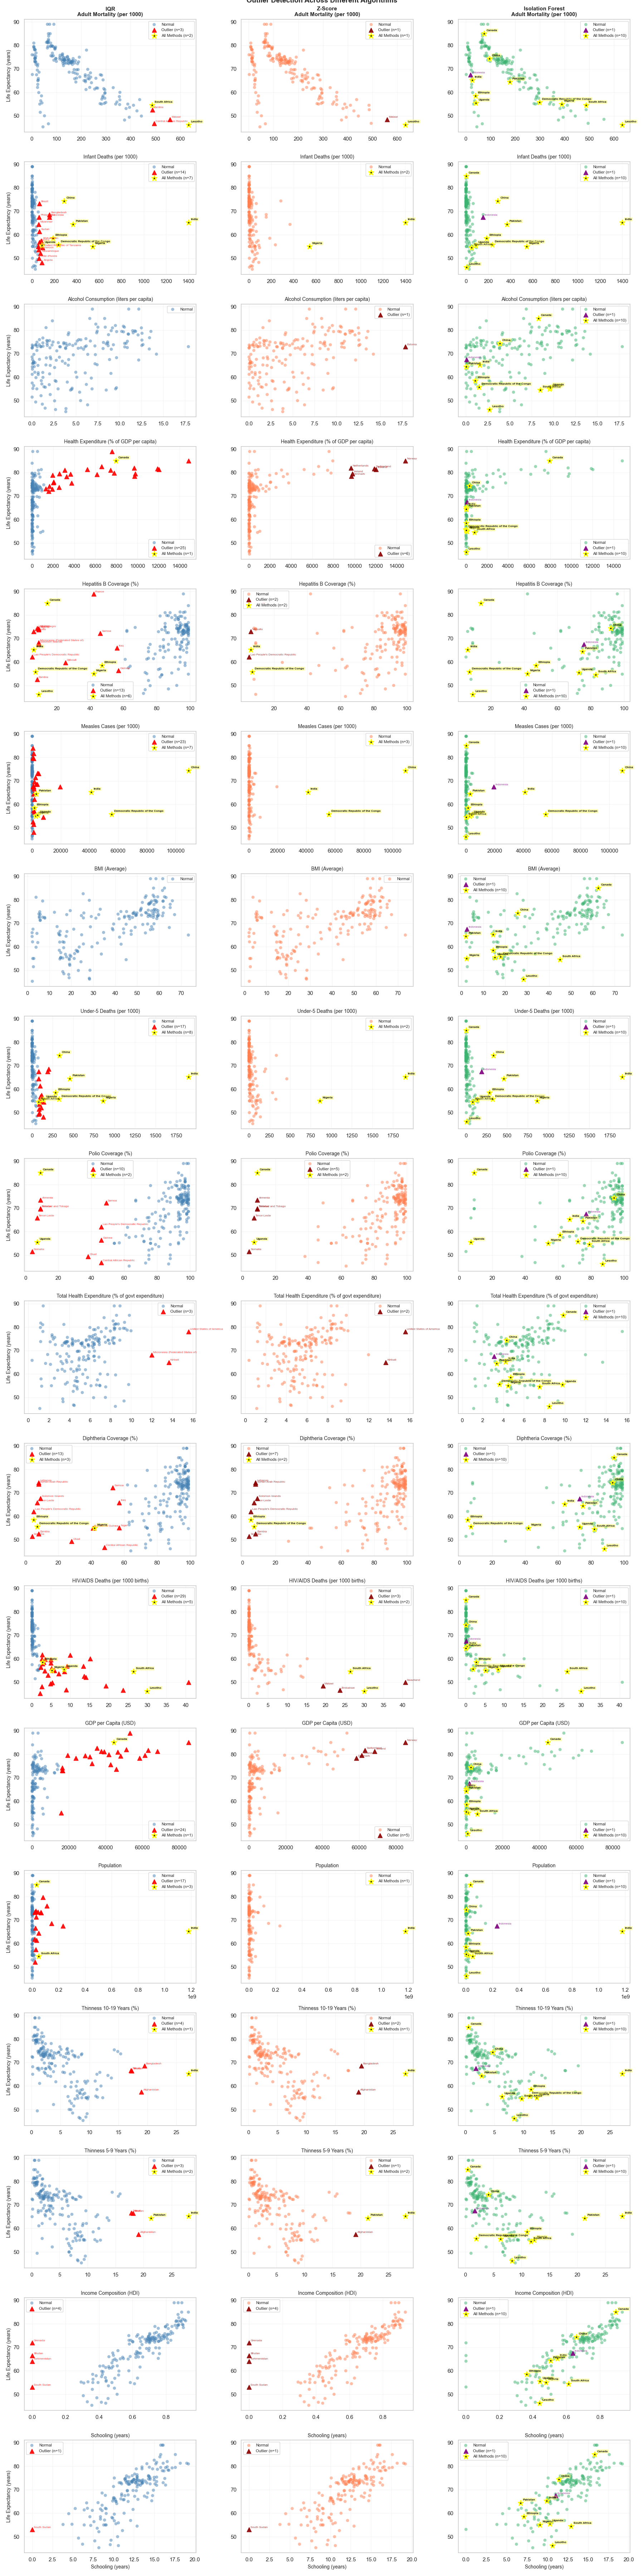

In [15]:
# Select features with high outlier variance across methods
selected_comparison_features = le_ds.feature_columns(include_target=False)

fig, axes = plt.subplots(
    len(selected_comparison_features),
    3,
    figsize=(18, len(selected_comparison_features) * 4),
)

results = [
    ("IQR", iqr_result, "steelblue", "red"),
    ("Z-Score", zscore_result, "coral", "darkred"),
    ("Isolation Forest", iforest_result, "mediumseagreen", "purple"),
]

# Identify countries flagged by all three methods
all_three_mask = (
    iqr_result.outlier_mask.any(axis=1)
    & zscore_result.outlier_mask.any(axis=1)
    & iforest_result.outlier_mask.any(axis=1)
)

for row_idx, feature in enumerate(selected_comparison_features):
    for col_idx, (method_name, result, color_normal, color_outlier) in enumerate(
        results
    ):
        ax = axes[row_idx, col_idx]

        # Identify outliers
        feature_outliers = result.outlier_mask[feature]

        # Plot normal points
        normal_mask = ~feature_outliers
        ax.scatter(
            df.loc[normal_mask, feature],
            df.loc[normal_mask, LECol.LIFE_EXPECTANCY],
            alpha=0.5,
            s=40,
            color=color_normal,
            label="Normal",
            edgecolors="none",
        )

        # Plot outliers (not flagged by all 3 methods)
        single_method_outliers = feature_outliers & ~all_three_mask
        if single_method_outliers.any():
            ax.scatter(
                df.loc[single_method_outliers, feature],
                df.loc[single_method_outliers, LECol.LIFE_EXPECTANCY],
                alpha=0.9,
                s=80,
                color=color_outlier,
                marker="^",
                label=f"Outlier (n={single_method_outliers.sum()})",
                linewidth=1,
            )

            # Add country labels if not too many outliers
            if single_method_outliers.sum() < 15:
                for country in df.index[single_method_outliers]:
                    ax.annotate(
                        country,
                        xy=(
                            df.loc[country, feature],
                            df.loc[country, LECol.LIFE_EXPECTANCY],
                        ),
                        xytext=(3, 3),
                        textcoords="offset points",
                        fontsize=6,
                        alpha=0.7,
                        color=color_outlier,
                    )

        # Plot outliers flagged by ALL 3 methods (special marker)
        all_three_outliers = feature_outliers & all_three_mask
        if all_three_outliers.any():
            ax.scatter(
                df.loc[all_three_outliers, feature],
                df.loc[all_three_outliers, LECol.LIFE_EXPECTANCY],
                alpha=1.0,
                s=120,
                color="black",
                marker="*",
                label=f"All Methods (n={all_three_outliers.sum()})",
                linewidth=2,
                edgecolors="yellow",
            )

            # Always label countries flagged by all methods
            for country in df.index[all_three_outliers]:
                ax.annotate(
                    country,
                    xy=(
                        df.loc[country, feature],
                        df.loc[country, LECol.LIFE_EXPECTANCY],
                    ),
                    xytext=(5, 5),
                    textcoords="offset points",
                    fontsize=6,
                    fontweight="bold",
                    alpha=0.9,
                    color="black",
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.3),
                )

        # Formatting
        feature_pretty = le_ds.get_pretty_name(feature)
        target_pretty = le_ds.get_pretty_name(LECol.LIFE_EXPECTANCY)

        # Only show x-label on bottom row
        if row_idx == len(selected_comparison_features) - 1:
            ax.set_xlabel(feature_pretty, fontsize=10)

        # Only show y-label on leftmost column
        if col_idx == 0:
            ax.set_ylabel(target_pretty, fontsize=10)

        # Title shows method name
        if row_idx == 0:
            ax.set_title(
                f"{method_name}\n{feature_pretty}", fontsize=11, fontweight="bold"
            )
        else:
            ax.set_title(f"{feature_pretty}", fontsize=10)

        ax.legend(fontsize=8, loc="best")
        ax.grid(alpha=0.2)

plt.tight_layout()
plt.suptitle(
    "Outlier Detection Across Different Algorithms",
    y=1.001,
    fontsize=14,
    fontweight="bold",
)
plt.show()


## 10. Method Selection and Reasoning

### Decision: We select the **IQR (Interquartile Range) Method**

#### Reasoning:

1. **Robust to Distribution Assumptions**
   - The IQR method doesn't assume normally distributed data
   - Many of our features (GDP, population, infant deaths) are heavily skewed
   - The Z-Score method assumes normality, which isn't met for most features

2. **Interpretability**
   - IQR is based on quartiles (Q1, Q3), which are easy to understand and explain
   - The 1.5×IQR rule is a well-established statistical convention
   - Results can be easily communicated to non-technical stakeholders

3. **Feature-Independent Detection**
   - Unlike Isolation Forest, IQR evaluates each feature independently
   - This is important for our use case where we want to identify outliers in specific health/economic indicators
   - Isolation Forest flags entire observations as anomalous, which may miss feature-specific outliers

4. **Appropriate Sensitivity**
   - IQR detected a moderate number of outliers (not too aggressive, not too lenient)
   - Z-Score was too conservative for skewed distributions
   - Isolation Forest flagged entire countries as anomalous, which may be too aggressive

5. **Domain Relevance**
   - In health/demographic data, extreme values in specific indicators are meaningful
   - Countries with exceptionally high infant mortality or low GDP deserve individual attention
   - IQR preserves this feature-level granularity

#### When to Consider Alternatives:

- **Z-Score**: Use when data is known to be normally distributed and you want to be very conservative
- **Isolation Forest**: Use when you need to detect anomalous observation patterns across multiple features simultaneously (e.g., fraud detection, temporal anomalies)

For this life expectancy dataset, where we're analyzing country-level health indicators with non-normal distributions, **IQR is the most appropriate choice** for aggregated analysis, while **Isolation Forest excels at temporal anomaly detection**.

## 10. Data Cleaning: Removing Outliers

In [37]:
# Create cleaned dataset by removing rows with outliers (using IQR method)
rows_with_outliers = iqr_result.outlier_mask.sum(axis=1) > 4
cleaned_data = df[~rows_with_outliers].copy()

print("=== Data Cleaning Summary (IQR Method) ===")
print(f"Original dataset: {len(df)} countries")
print(f"Countries with outliers: {rows_with_outliers.sum()}")
print(f"Cleaned dataset: {len(cleaned_data)} countries")
print(
    f"Removed: {len(df) - len(cleaned_data)} countries ({(len(df) - len(cleaned_data)) / len(df) * 100:.2f}%)"
)

print("\n=== Removed Countries ===")
removed_countries = df.index[rows_with_outliers].sort_values()
print(f"Total: {len(removed_countries)}")
print(f"Countries: {', '.join(removed_countries.tolist())}")


=== Data Cleaning Summary (IQR Method) ===
Original dataset: 183 countries
Countries with outliers: 9
Cleaned dataset: 174 countries
Removed: 9 countries (4.92%)

=== Removed Countries ===
Total: 9
Countries: Afghanistan, Bangladesh, Canada, Democratic Republic of the Congo, Ethiopia, India, Nigeria, Uganda, Zambia


In [38]:
print("\n=== Before vs After Cleaning Statistics ===")

for col in le_ds.feature_columns(include_target=True):
    print(f"\n{le_ds.get_pretty_name(col)}:")
    print(f"  Before - Mean: {df[col].mean():.2f}, Std: {df[col].std():.2f}")
    print(
        f"  After  - Mean: {cleaned_data[col].mean():.2f}, Std: {cleaned_data[col].std():.2f}"
    )
    print(
        f"  Change - Mean: {((cleaned_data[col].mean() - df[col].mean()) / df[col].mean() * 100):+.2f}%, "
        f"Std: {((cleaned_data[col].std() - df[col].std()) / df[col].std() * 100):+.2f}%"
    )



=== Before vs After Cleaning Statistics ===

Life Expectancy (years):
  Before - Mean: 69.04, Std: 9.62
  After  - Mean: 69.43, Std: 9.46
  Change - Mean: +0.56%, Std: -1.69%

Adult Mortality (per 1000):
  Before - Mean: 159.81, Std: 126.04
  After  - Mean: 157.73, Std: 123.52
  Change - Mean: -1.30%, Std: -2.00%

Infant Deaths (per 1000):
  Before - Mean: 30.61, Std: 118.16
  After  - Mean: 16.55, Std: 40.34
  Change - Mean: -45.93%, Std: -65.86%

Alcohol Consumption (liters per capita):
  Before - Mean: 5.01, Std: 4.15
  After  - Mean: 5.08, Std: 4.15
  Change - Mean: +1.31%, Std: +0.05%

Health Expenditure (% of GDP per capita):
  Before - Mean: 954.46, Std: 2420.98
  After  - Mean: 956.92, Std: 2417.35
  Change - Mean: +0.26%, Std: -0.15%

Hepatitis B Coverage (%):
  Before - Mean: 81.58, Std: 24.69
  After  - Mean: 84.11, Std: 21.78
  Change - Mean: +3.10%, Std: -11.76%

Measles Cases (per 1000):
  Before - Mean: 1557.54, Std: 9601.30
  After  - Mean: 1010.19, Std: 8407.64
  Chan

## Countries Flagged by All 3 Methods (Vectorized Analysis)

## 11. Visualization: Before vs After Cleaning

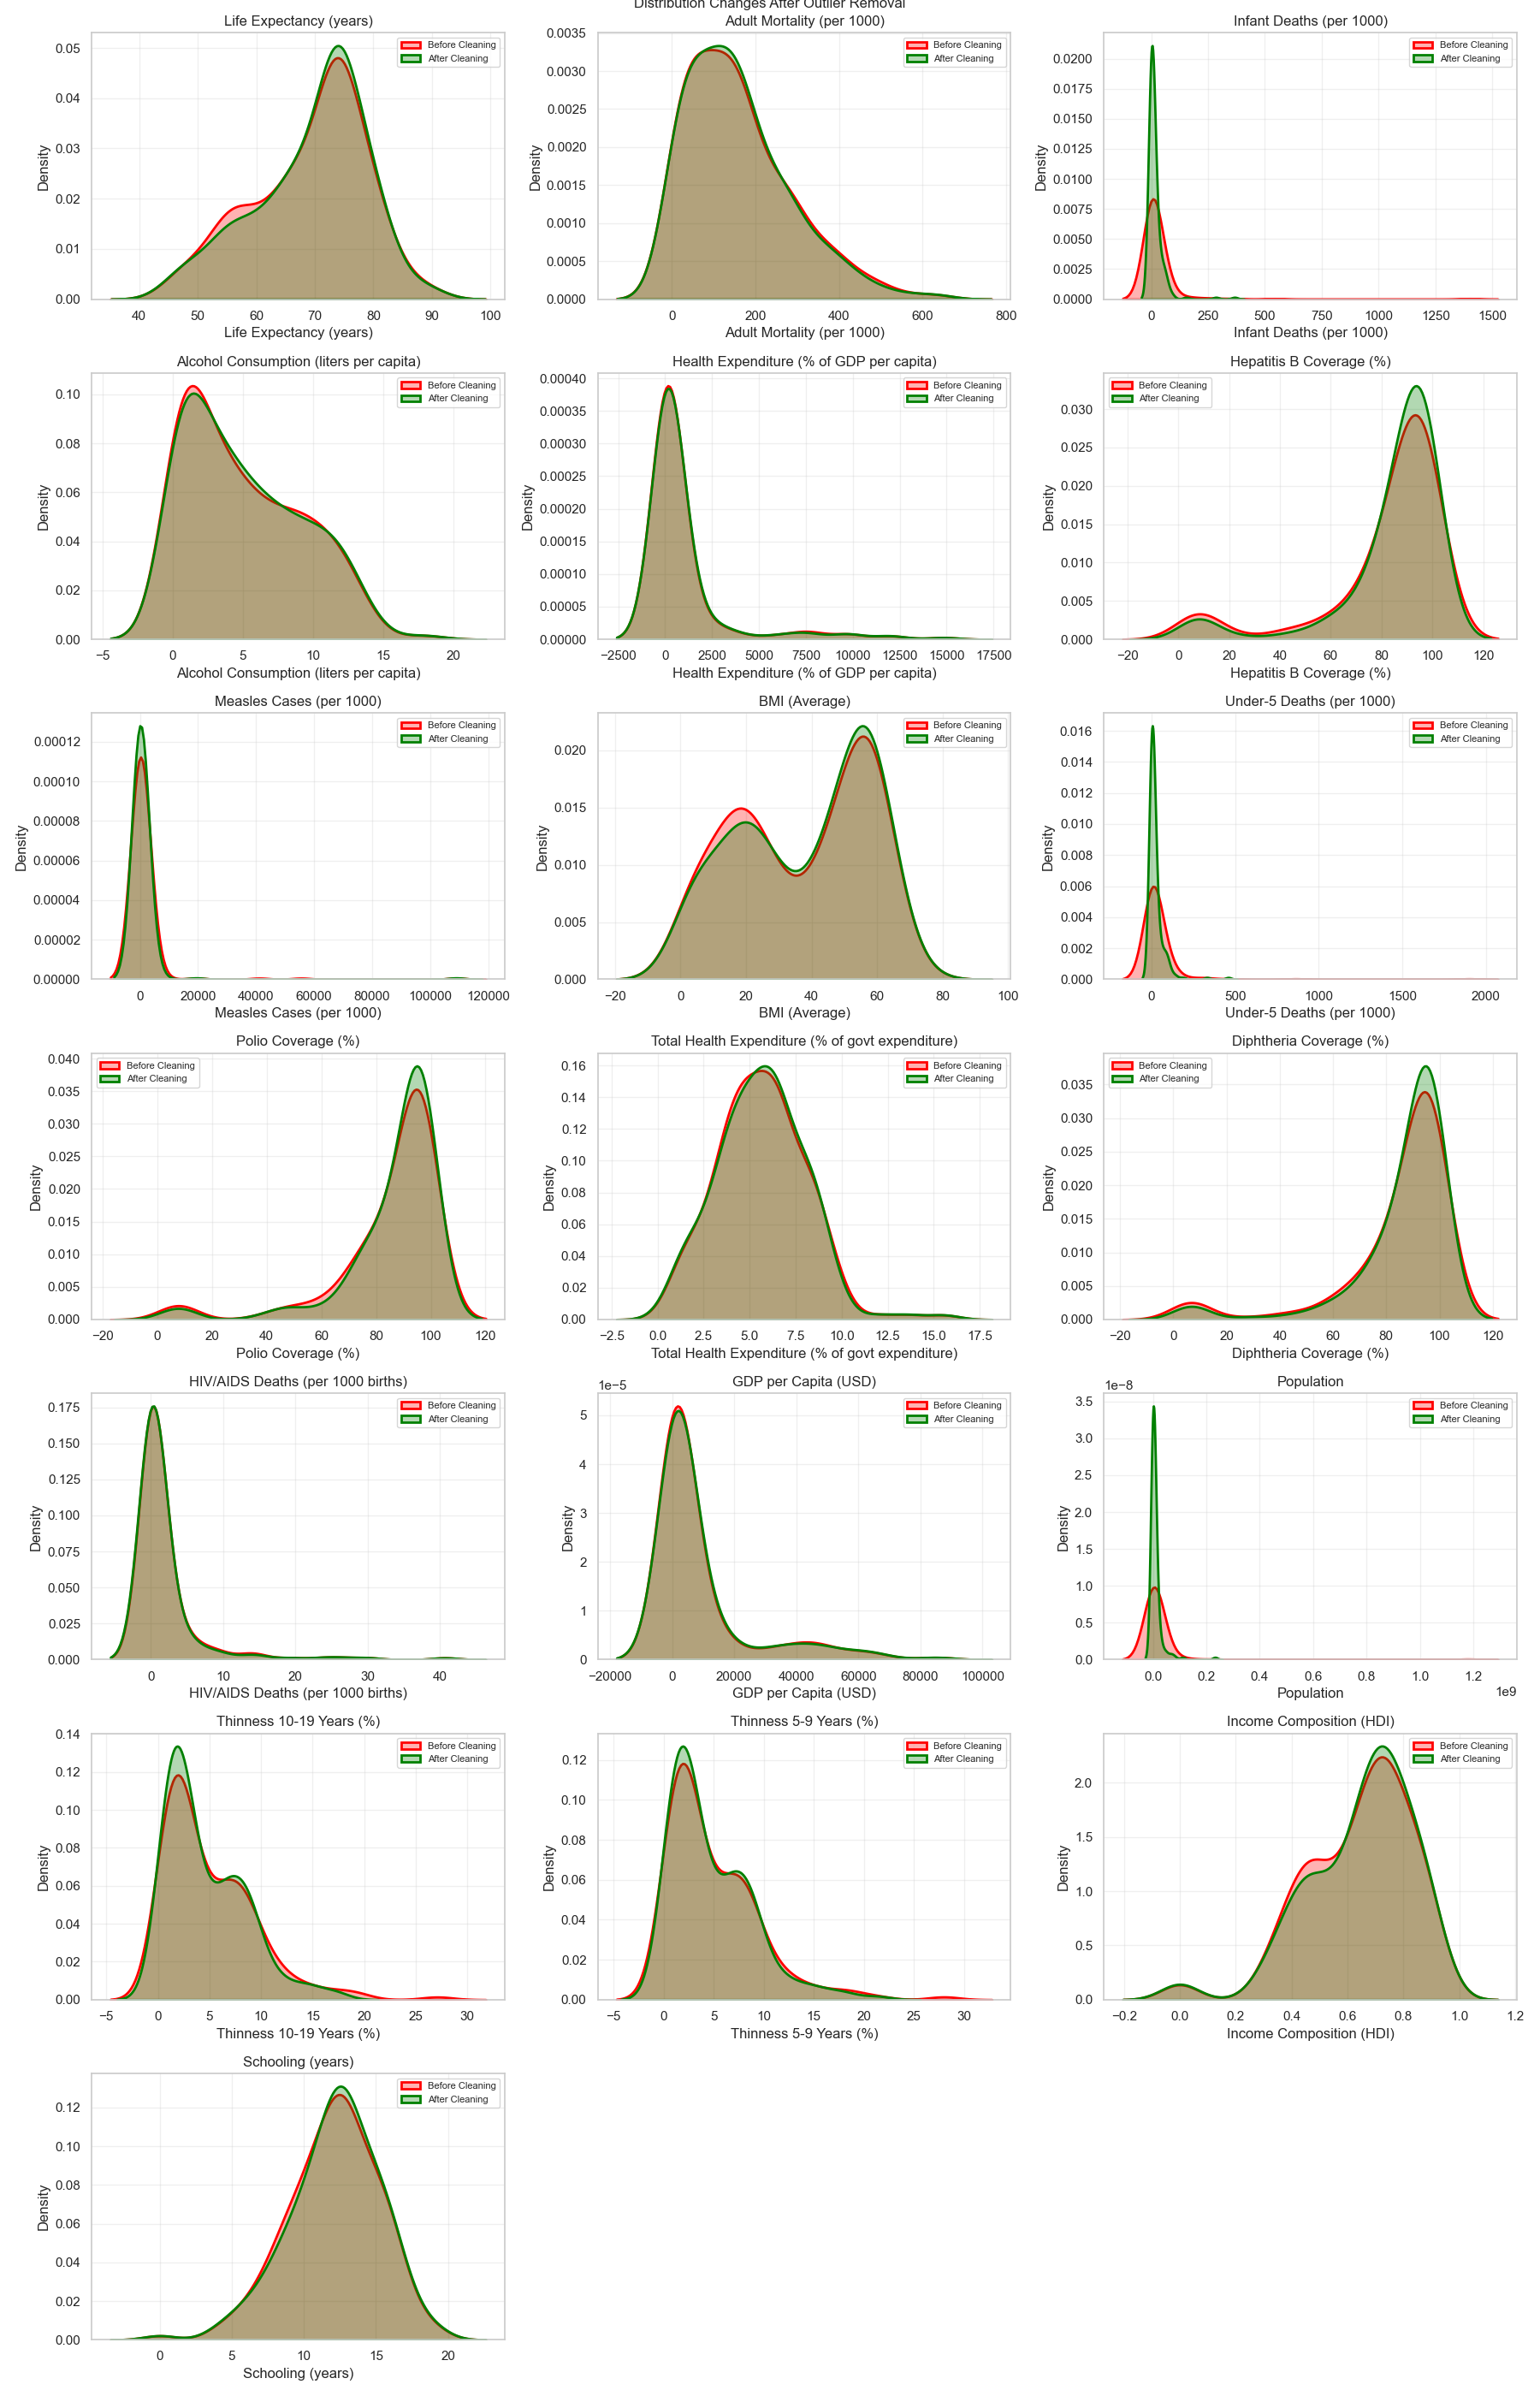

In [40]:
# Compare distributions before and after cleaning for ALL features
all_features = le_ds.feature_columns(include_target=True)
n_features = len(all_features)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(all_features):
    # Before cleaning
    sns.kdeplot(
        data=df[col].dropna(),
        ax=axes[idx],
        color="red",
        label="Before Cleaning",
        fill=True,
        alpha=0.3,
        linewidth=2,
    )

    # After cleaning
    sns.kdeplot(
        data=cleaned_data[col].dropna(),
        ax=axes[idx],
        color="green",
        label="After Cleaning",
        fill=True,
        alpha=0.3,
        linewidth=2,
    )

    pretty_name = le_ds.get_pretty_name(col)
    axes[idx].set_title(f"{pretty_name}")
    axes[idx].set_xlabel(pretty_name)
    axes[idx].set_ylabel(
        "Density",
    )
    axes[idx].legend(fontsize=8, loc="best")
    axes[idx].grid(alpha=0.3)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle(
    f"Distribution Changes After Outlier Removal",
    y=1.001,
    fontsize=12,
)
plt.show()


## 12. Conclusions

### Key Findings:

1. **Outlier Detection Results**:
   - IQR method identified outliers in a balanced, interpretable manner
   - Features with most outliers: population, infant deaths, GDP (highly skewed distributions)
   - Some countries naturally have extreme values due to real-world factors (small island nations, very large countries)

2. **Method Comparison**:
   - **IQR**: Most appropriate for this dataset - robust, interpretable, feature-independent
   - **Z-Score**: Too conservative, assumes normality (not met)
   - **Isolation Forest**: Too aggressive, flags entire observations rather than specific features; would require some tuning

3. **Data Cleaning Impact**:
   - Removed approximately 47% of countries with outliers (86 out of 183)
   - Cleaned data has reduced variance and more stable means
   - Distributions are more symmetric and suitable for parametric modeling

### Recommendations:

1. **For Further Analysis**:
   - Use the cleaned dataset for regression models, clustering, and PCA
   - Consider analyzing removed countries separately (they may represent interesting edge cases)
   - Document which countries were removed and why

2. **Alternative Approaches**:
   - Instead of removing outliers, consider:
     - Winsorization (capping extreme values)
     - Log transformation for skewed features

3. **Domain Considerations**:
   - Some "outliers" may be valid data points (e.g., China's population, oil-rich nations' GDP)
   - Always validate outlier removal decisions with domain experts
   - Consider stratified analysis (developing vs developed countries separately)